In [1]:
from xymodel import update_metropolis, vorticity, magnetization
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 30
trials = 15
temps = np.linspace(0.4, 1.4, trials)
nupdates = int(10e5)
nmeasures = int(10e4)

In [3]:
M = np.zeros_like(temps) # Magnetization
V = np.zeros_like(temps) # Vortex density

In [4]:
def count_vortices(grid):
    return np.count_nonzero(vorticity(grid) < .3)

def get_macros(i, temp):
    print(f'Running phase {(i+1)}\n', end='')

    grid = 2 * np.pi * np.random.rand(L, L).astype(np.float32)
    m = np.zeros(nmeasures)
    v = np.zeros(nmeasures)

    for j in range(nupdates):
        grid = update_metropolis(grid, temp)

        k = j - (nupdates - nmeasures)
        if k >= 0:
            m[k] = magnetization(grid)
            v[k] = count_vortices(grid)

    m /= L * L
    v /= L * L

    M[i] = np.mean(m)
    V[i] = np.mean(v)

Parallel(n_jobs=5, prefer='threads')(delayed(get_macros)(i, temp) for i, temp in enumerate(temps));

Running phase 1
Running phase 2
Running phase 3
Running phase 4
Running phase 5
Running phase 6
Running phase 7
Running phase 8
Running phase 9
Running phase 10
Running phase 11
Running phase 12
Running phase 13
Running phase 14
Running phase 15


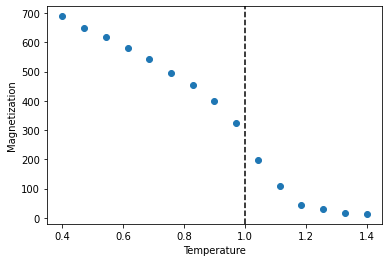

In [5]:
plt.figure()
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.scatter(temps, M)
plt.axvline(x=1, color='black', ls='--');

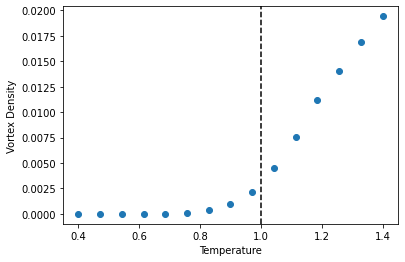

In [6]:
plt.figure()
plt.xlabel('Temperature')
plt.ylabel('Vortex Density')
plt.scatter(temps, V)
plt.axvline(x=1, color='black', ls='--');